# Regression

某城市的电网系统需要升级，以应对日益增长的用电需求。电网系统需要考虑最高温度对城市的峰值用电量的影响。项目负责人需要预测明天城市的峰值用电量，他搜集了以往的数据。现在，负责人提供了他搜集到的数据，并请求你帮他训练出一个模型，这个模型能够很好地预测明天城市的峰值用电量。

首先，你导入负责人提供的数据。

In [7]:
import numpy as np
import os

data = np.loadtxt("data.txt")
# data 数据第一列为人口信息
X_data = data[:, 0].reshape(-1,1)
# data 数据第三列为城市峰值用电量
y_data = data[:, 2].reshape(-1,1)

print("X shape: ", X_data.shape)
print("y shape: ", y_data.shape)

X shape:  (100, 1)
y shape:  (100, 1)


接着，可视化数据。

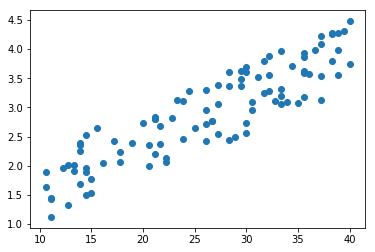

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
%matplotlib inline

plt.scatter(X_data, y_data)

你决定使用回归算法来训练一个模型，用来预测明天城市的峰值用电量。

## Regression 模型

设输入的特征——最高温度(F)为$x^{(i)} \in \mathbb{R}^{n+1}$，$i=1,\cdots,m$。m为样本总数，在该例子中为100。n为特征的个数，这里为1。
$$
x^{(i)} \in \mathbb{R}^2 = \begin{bmatrix} 1 \\ \text{high temperature for day i} \end{bmatrix}
$$

设输出为$y^{(i)} \in \mathbb{R}$，表示第i天的峰值用电量。

参数为$\theta \in \mathbb{R}^{n+1} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix}$

在该例子中，模型应该为一条直线，假设模型为：
$$h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x $$

## 损失函数

模型的预测结果和实际结果有差距，为了衡量它们之间的差距，或者说使用这个模型产生的损失，我们定义损失函数$l(h_\theta(x), y)$。回归问题一般使用平方损失：
$$
l(h_\theta(x), y) = \left ( h_\theta(x) - y \right )^2
$$

上述损失函数表示一个样本的损失，训练集的损失使用$J(\theta)$表示：
$$
\begin{aligned}
J(\theta) & = \frac{1}{2m} \sum_{i=1}^{m}l(h_\theta(x), y) \\
& = \frac{1}{2m} \sum_{i=1}^{m} \left ( h_\theta(x) - y \right )^2 \\
& = \frac{1}{2m} \sum_{i=1}^{m} \left ( \theta^T x - y \right )^2
\end{aligned}
$$
（其中数字2的作用是方便以后的运算）

为了使模型的预测效果好，需要最小化训练集上的损失，$\underset{\theta}{\text{minimize}} J(\theta)$。

## 梯度下降法

为了得到使得损失函数$J(\theta)$最小化的$\theta$，可以使用梯度下降法。

损失函数$J(\theta)$的函数图像如下
![损失函数J](images/loss_function_j.png)

损失函数$J(\theta)$关于参数向量$\theta$中的一个参数比如$\theta_1$的函数图是
![theta-J 函数图](images/theta-J.png)

假设一开始$J(\theta)$的值在紫色点上，为了降低$J(\theta)$值，需要$\theta_1$往右变移动，这个方向是$J(\theta)$在$\theta_1$上的负梯度。只要$\theta$不断往负梯度方向移动，$J(\theta)$一定可以降到最低值。梯度下降法就是使参数$\theta$不断往负梯度移动，经过有限次迭代(更新$\theta$值)之后，损失函数$J(\theta)$达到最低值。

梯度下降法的过程：
1. 初始化参数向量$\theta$。
2. 开始迭代：
  1. 计算损失函数$J(\theta)$，
  2. 计算$\theta$的梯度，
  3. 更新参数$\theta$。


现在，我们开始实现 Regression 学习算法。

**任务1：** 首先在X前面加上一列1，表示参数$\theta_0$的系数，方便运算。
提示：使用`np.hstack`把两个矩阵水平合在一起。用1初始化向量或矩阵的函数是`np.ones`。(函数详情使用python的帮助函数`help`，比如`help(np.ones)`，或者百度。)

In [9]:
### START CODE HERE ###

theta_zero = np.ones(X_data.shape)
X_train = np.hstack((theta_zero, X_data))

### END CODE HERE ###

y_train = y_data

print("X_train shape: ", X_train.shape)
print("X_train[:5,:] = ", X_train[:5,:])


X_train shape:  (100, 2)
X_train[:5,:] =  [[ 1.   39.44]
 [ 1.   37.22]
 [ 1.   33.33]
 [ 1.   26.11]
 [ 1.   21.67]]


**任务2：** 接着，初始化参数向量$\theta$。$\theta$的shape是(2,1)，我们随机初始化$\theta$。

提示：numpy的随机函数是`np.random.rand`。

In [10]:
def init_theta(shape):
    """初始化参数
    参数：
        shape: 参数形状
    返回：
        theta_init: 初始化后的参数
    
    """
    np.random.seed(0)
    m, n = shape
    ### START CODE HERE ###

    theta_init = np.random.rand(m, n)

    ### END CODE HERE ###
    
    return theta_init

In [11]:
theta_init = init_theta((2,1))

print("theta_init shape: ", theta_init.shape)
print("theta_init = ", theta_init)


theta_init shape:  (2, 1)
theta_init =  [[0.5488135 ]
 [0.71518937]]


梯度下降的迭代过程包括3个步骤。

**第1步：** 计算损失函数$J(\theta)$的值。使用for循环逐个计算样本的损失值的效率不高，当数据集的样本数据非常多，使用for循环计算损失函数$J(\theta)$的效率非常低。效率高的方法是使用向量实现计算损失函数$J(\theta)$。$X$ 大小为$m \times (n+1)$，每行是一条样本特征向量，$\theta$ 大小为$(n+1) \times 1$，可以$X \theta$计算所有样本的预测结果，接着$(X \theta - y)^2$计算所有样本的损失值，最后求和并除以2m得到$J(\theta)$的值。

**任务3：** 实现计算$J(\theta)$的函数。
提示：矩阵运算使用`np.dot`函数，平方运算使用`np.power(data, 2)`函数，求和运算使用`np.sum`。

In [12]:
def compute_J(X, y, theta):
    """计算损失函数J
    参数：
        X: 训练集数据特征，shape: (m, n+1)
        y: 训练集数据标签，shape: (m, 1)
        theta: 参数，shape: (n+1, 1)
        
    返回：
        loss: 损失值
    """
    
    m = X.shape[0]
    
    ### START CODE HERE ###

    loss = sum(np.power(np.dot(X, theta) - y, 2)) / (2 * m)

    ### END CODE HERE ###
    
    return loss

In [13]:
loss_init = compute_J(X_train, y_train, theta_init)
print("loss_init = ", loss_init)


loss_init =  [148.87165656]


**第2步：** 计算参数$\theta$的梯度。在该例子中，损失函数$J(\theta)$为
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left ( \theta_0 x_0 + \theta_1 x_1 - y \right )^2
$$
$\theta_0$的梯度为
$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} \left ( \theta_0 x_0 + \theta_1 x_1 - y \right ) x_0
$$
$\theta_1$的梯度为
$$
\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} \left ( \theta_0 x_0 + \theta_1 x_1 - y \right ) x_1
$$
一般化后
$$
\frac{\partial J(\theta)}{\partial \theta_i} = \frac{1}{m} \sum_{i=1}^{m} \left ( \theta^T x - y \right ) x_i
$$

**任务4：** 实现`gradient`函数，这里同样用向量化实现，向量化公式为
$$
\text{gradients} = X^T (X \theta - y) / m
$$
提示：矩阵A的转置表示为`A.T`

In [14]:
def compute_gradient(X, y, theta):
    """计算参数theta的梯度值
    参数：
        X: 训练集数据特征，shape: (m, n+1)
        y: 训练集数据标签，shape: (m, 1)
        theta: 参数，shape: (n+1, 1)
        
    返回：
        gradients: theta的梯度列表
    """
    
    m = X.shape[0]
    gradients = None
    
    ### START CODE HERE ###
    
    gradients = np.dot(X.T, np.dot(X, theta) - y) / m;

    ### END CODE HERE ###
    
    return gradients

In [15]:
gradients_init = compute_gradient(X_train, y_train, theta_init)

print("gradients_init shape : ", gradients_init.shape)
print("gradients_init = ", gradients_init)


gradients_init shape :  (2, 1)
gradients_init =  [[ 16.32138507]
 [475.51600546]]


**第3步：** 更新参数$\theta$。为了让损失函数$J(\theta)$值降低，需要使$\theta$往负梯度方向移动，因此更新操作为：
$$
\theta_i := \theta_i - \alpha \frac{\partial J(\theta)}{\partial \theta_i}
$$
其中，$\alpha$是学习参数，控制$\theta$的移动步长，是一个超参数，需要自己选择合适的值。如果$\alpha$太小，梯度下降的收敛速度会变慢，而如果$\alpha$太大，则可能损失函数$J(\theta)$值会变大。

注意，$\theta$中的元素要同时更新。

**任务5：** 实现`update_parameters`函数。

In [16]:
def update_parameters(theta, gradients, learning_rate=0.01):
    """更新参数theta
    参数：
        theta: 参数，shape: (n+1, 1)
        gradients: 梯度，shape: (m+1, 1)
        learning_rate: 学习率，默认为0.01
        
    返回：
        parameters: 更新后的参数
    """
    ### START CODE HERE ###

    parameters = theta - learning_rate * gradients

    ### END CODE HERE ###
    
    return parameters

In [17]:
theta_one_iter = update_parameters(theta_init, gradients_init)

print("theta_one_iter = ", theta_one_iter)


theta_one_iter =  [[ 0.38559965]
 [-4.03997069]]


**任务6：** 现在，实现梯度下降函数。梯度下降的迭代次数参数iter_num也是一个超参数，如果iter_num太小，损失函数$J(\theta)$还没有收敛；如果iter_num太大，损失函数$J(\theta)$早就收敛了，过多的迭代浪费时间。

In [18]:
def gradient_descent(X, y, theta_init, iter_num = 100, learning_rate=0.01):
    """梯度下降函数
    参数：
        X: 训练集数据特征，shape: (m, n+1)
        y: 训练集数据标签，shape: (m, 1)
        iter_num: 梯度下降的迭代次数
        theta_init: 初始化的参数，shape: (n+1, 1)
    返回：
        loss_history: 每次迭代的损失值
        theta_history: 每次迭代更新后的参数
        theta: 训练得到的参数
    """
    
    loss_history = []
    theta_history = []
    theta = theta_init
    
    for i in range(iter_num):
        
        ### START CODE HERE ###
        
        loss = compute_J(X, y, theta)
        gradients = compute_gradient(X, y, theta)
        theta = update_parameters(theta, gradients, learning_rate)

        ### END CODE HERE ###
        
        loss_history.append(loss)
        theta_history.append(theta)
    
    return loss_history, theta_history, theta

theta =  [[0.52759494]
 [0.09026695]]
loss =  [0.06366695]


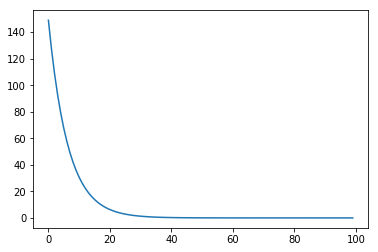

In [19]:
# 尝试不同的学习率和迭代次数
# 提交作业之前要把学习效率改为0.0001，然后重新运行一遍

loss_history, theta_history, theta = gradient_descent(X_train, y_train, theta_init, learning_rate=0.0001)

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])


现在直观地了解一下梯度下降的过程。

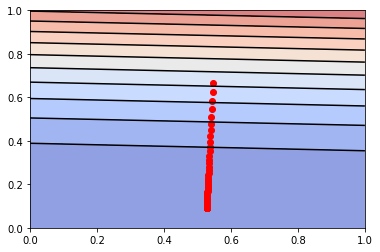

In [20]:
theta_0 = np.linspace(0, 1, 50)
theta_1 = np.linspace(0, 1, 50)
theta_0, theta_1 = np.meshgrid(theta_0,theta_1)
J = np.zeros_like(theta_0)

for i in range(50):
    for j in range(50):
        J[i,j] = compute_J(X_train, y_train, np.array([[theta_0[i,j]],[theta_1[i,j]]]))

plt.contourf(theta_0, theta_1, J, 10, alpha = 0.6, cmap = plt.cm.coolwarm)
C = plt.contour(theta_0, theta_1, J, 10, colors = 'black')

# 画出损失函数J的历史位置
history_num = len(theta_history)
theta_0_history = np.zeros(history_num)
theta_1_history = np.zeros(history_num)
for i in range(history_num):
    theta_0_history[i],theta_1_history[i] = theta_history[i][0,0],theta_history[i][1,0]
plt.scatter(theta_0_history, theta_1_history, c="r")

可以看到，$J(\theta)$的值不断地往最低点移动。在y轴，$J(\theta)$下降的比较快，在x轴，$J(\theta)$下降的比较慢。

## 多变量回归
上述例子时单变量回归的例子，样本的特征只有一个——一天的最高温度。负责人进过分析后发现，城市一天的峰值用电量还与城市人口有关系，因此，他在回归模型中添加城市人口变量$x_2$，你的任务是训练这个多变量回归方程：
$$
h(x) = \theta^T x = \theta_0 * x_0 + \theta_1 * x_1 + \theta_2 * x_2
$$
之前实现的梯度下降法使用的对象是$\theta$和X向量，所示实现的梯度下降函数适用单变量回归和多变量回归。

**任务7：** 现在，训练一个多变量回归模型。

theta =  [[0.52863545]
 [0.69501131]
 [0.0456051 ]
 [0.52100371]]
loss =  [0.12715284]


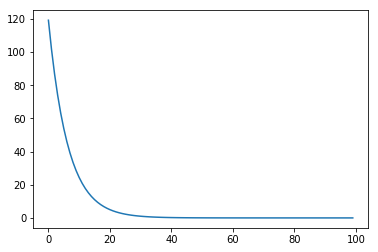

In [21]:
# data 数据第二列为人口信息
X_data = data[:,0:2].reshape(100, 2)
y_data = data[:,2].reshape(100, 1)

### START CODE HERE ###
# 训练多变量回归模型

theta_zero = np.ones(X_data.shape)
X_train = np.hstack((theta_zero, X_data))
y_train = y_data
theta_init = init_theta((4, 1))

loss_history, _, theta = gradient_descent(X_train, y_train, theta_init, learning_rate=0.0001)

### END CODE HERE ###

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])


## 多项式回归

当我们数据的特征x与y的关系不是线性关系，而且又找不到合适的映射函数时，可以尝试多项式回归。多项式回归的最大优点就是可以通过增加x的高次项对实测点进行逼近，直至满意为止。事实上，多项式回归可以处理相当一类非线性问题，它在回归分析中占有重要的地位，因为任一函数都可以分段用多项式来逼近。因此，在通常的实际问题中，不论依变量与其他自变量的关系如何，我们总可以用多项式回归来进行分析。假设数据的特征只有一个a，多项式的最高次数为K，那么多项式回归方程为：
$$
h(x) = \theta^T x = \theta_0 * a^0 + \theta_1 * a^1 + \theta_2 * a^2 + \cdots + \theta_K * a^K
$$
若令$x = \begin{bmatrix} a^0, a^1, a^2, \cdots, a^K \end{bmatrix}^T$，那么
$$
h(x) = \theta^T x = \theta_0 * x_0 + \theta_1 * x_1 + \theta_2 * x_2, \cdots, \theta_K * x^K
$$
这就变为多变量回归了。

**任务8：**现在训练一个多项式模型，K取2。

提示，$x_1$和$x_2$的二次多项式为：
$$
\theta_0 * 1 + \theta_1 * x_1 + \theta_2 * x_2 + \theta_3 * x_1 * x_2 + \theta_4 * x_1^2 + \theta_5 * x_2^2
$$

theta =  [[ 0.54797944]
 [ 0.69650281]
 [ 0.60161396]
 [ 0.51772026]
 [-0.03852189]
 [ 0.64425476]]
loss =  [46.25622617]


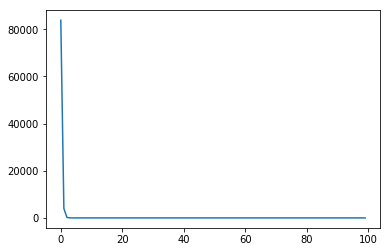

In [22]:
X_data = data[:,0:2].reshape(100, 2)
y_data = data[:,2].reshape(100, 1)

### START CODE HERE ###
# 训练多项式回归模型

X_train = np.zeros((100, 6))
X_train[:,0] = np.ones((100,))
# x_1 和 x_2 拓展为多次项
X_train[:,0] = np.ones((100,))
X_train[:,1] = X_data[:,0]
X_train[:,2] = X_data[:,1]
X_train[:,3] = X_data[:,0] * X_data[:,1]
X_train[:,4] = X_data[:,0] * X_data[:,0]
X_train[:,5] = X_data[:,1] * X_data[:,1]
y_train = y_data

theta_init = init_theta((6, 1))

loss_history, _, theta = gradient_descent(X_train, y_train, theta_init, learning_rate=0.000001)

### END CODE HERE ###

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

## 特征归一化

特征归一化可以确保特征在相同的尺度，加快梯度下降的收敛过程。

**任务9：** 对数据进行零均值单位方差归一化处理。零均值单位方差归一化公式：
$$
x_i = \frac{x_i - \mu_i}{\sigma_i}
$$
其中i表示第i个特征，$\mu_i$表示第i个特征的均值，$\sigma_i$表示第i个特征的标准差。进行零均值单位方差归一化处理后，数据符合标准正态分布，即均值为0，标准差为1。注意，使用新样本进行预测时，需要对样本的特征进行相同的缩放处理。

提示：求特征的均值，使用numpy的函数`np.mean`，求特征的标准差，使用numpy的函数`np.std`，需要注意对哪个维度求均值和标准差。

mu =  [26.1164  1.1463]
sigma =  [8.81399938 0.36134376]
theta =  [[ 2.81738342e+00]
 [ 7.39683739e-01]
 [ 2.84940004e-03]
 [-2.38799317e-03]
 [ 1.08639145e-01]
 [-6.88875680e-02]]
loss =  [0.05885954]


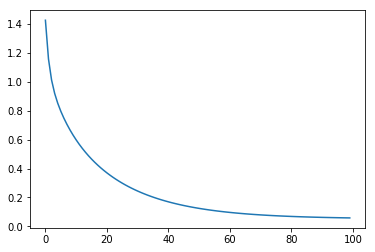

In [85]:

### START CODE HERE ###

# 计算特征的均值 mu
mu = np.mean(X_data, axis = 0)
# 计算特征的标准差 sigma
sigma = np.std(X_data, axis = 0)
# 零均值单位方差归一化
X_norm = (X_data - mu) / sigma

# 训练多项式回归模型

X_train[:,0] = np.ones((100,))
X_train[:,1] = X_norm[:,0]
X_train[:,2] = X_norm[:,1]
X_train[:,3] = X_norm[:,0] * X_norm[:,1]
X_train[:,4] = X_norm[:,0] * X_norm[:,0]
X_train[:,5] = X_norm[:,1] * X_norm[:,1]
y_train = y_data

theta_init = init_theta((6, 1))

# 学习率使用0.1
loss_history, _, theta = gradient_descent(X_train, y_train, theta_init, learning_rate = 0.1)

### END CODE HERE ###

print("mu = ", mu)
print("sigma = ", sigma)

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])


我们来直观地了解特征尺度归一化的梯度下降的过程。这里只展示单变量回归梯度下降过程。

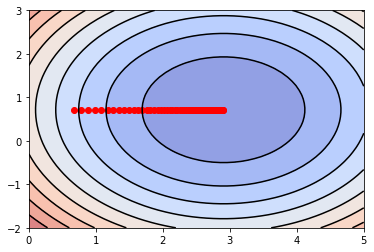

In [86]:
X_show = X_train[:,0:2]
theta_show = init_theta((2,1))
# 画损失函数曲面图
loss_history, theta_history, theta = gradient_descent(X_show, y_train, theta_show, learning_rate=0.05)

theta_0 = np.linspace(0, 5, 50)
theta_1 = np.linspace(-2, 3, 50)
theta_0, theta_1 = np.meshgrid(theta_0,theta_1)
J = np.zeros_like(theta_0)

for i in range(50):
    for j in range(50):
        J[i,j] = compute_J(X_show, y_train, np.array([[theta_0[i,j]],[theta_1[i,j]]]))

plt.contourf(theta_0, theta_1, J, 10, alpha = 0.6, cmap = plt.cm.coolwarm)
C = plt.contour(theta_0, theta_1, J, 10, colors = 'black')

# 画出损失函数J的历史位置
history_num = len(theta_history)
theta_0_history = np.zeros(history_num)
theta_1_history = np.zeros(history_num)
for i in range(history_num):
    theta_0_history[i],theta_1_history[i] = theta_history[i][0,0],theta_history[i][1,0]
plt.scatter(theta_0_history, theta_1_history, c="r")

可以看到，$J(\theta)$的值不断地往最低点移动。与没有进行特征尺度归一化的图相比，归一化后，每个维度的变化幅度大致相同，这有助于$J(\theta)$的值快速下降到最低点。

## AdaGrad
接着来讲讲梯度下降的优化算法 AdaGrad。

当$J(\theta)$收敛到最低值附近时，因为步长$\alpha$大小固定的原因，$J(\theta)$会在最低值附近徘徊，而不能到达最低值。因此，AdaGrad的想法是随着迭代次数的增加降低学习率$\alpha$，学习率$\alpha$衰减的方式是
$$
\alpha^t = \frac{\alpha}{\sqrt{t+1}}
$$
其中t表示第t次迭代。

如果梯度数值小，$J(\theta)$的移动步长小，$J(\theta)$在坡度平缓的区域内下降速度会变慢。AdaGrad使用均方根来加快$J(\theta)$在平缓区域的下降速度。均方根的表示为
$$
\sigma^t = \sqrt{\frac{1}{t+1} \sum_{i=0}^{t}(g^i)2}
$$
其中$g^i$表示历史的梯度值。AdaGrad 的更新参数公式是
$$
\begin{aligned}
\theta^{t+1} & := \theta^t - \frac{\alpha^t}{\sigma^t} g^t \\
& := \theta^t - \frac{\alpha}{\sqrt{\sum_{i=0}^t (g^i)^2}} g^t
\end{aligned}
$$
在坡度平缓的区域，均方根的数值小，梯度除以一个数值小的数会变大，从而加大了$J(\theta)$移动步长，也因此加快梯度下降速度。但是，AdaGrad的缺点是，随着迭代次数的增大，均方根会越来越大，梯度趋近于0，导致训练提前停止。为了防止分母为0，我们给分母加上一个小数值$10^{-7}$。
$$
\theta^{t+1} := \theta^t - \frac{\alpha}{\sqrt{\sum_{i=0}^t (g^i)^2} + 10^{-7}} g^t
$$

**任务10：** 接下来实现 AdaGrad。首先实现参数更新函数。

In [87]:
def update_parameters_adagrad(theta, gradients_history, learning_rate = 0.01):
    """ AdaGrad 的参数更新函数
    参数：
        theta: 参数，shape: (m, n+1)
        gradients_history: 历史梯度列表
    返回：
        parameters: 更新后的参数
    """
    grad_squared = np.zeros_like(theta)
    history_len = len(gradients_history)
    gradients = None
    
    ### START CODE HERE ###
        
    for i in range(history_len):        
        gradients = gradients_history[i]
        grad_squared += gradients ** 2
    
    parameters = theta -  learning_rate / (np.sqrt(grad_squared) + 10 ** -7) * gradients_history[-1]
    
    ### END CODE HERE ###
    
    return parameters

In [88]:
gradients_init = compute_gradient(X_train, y_train, theta_init)
theta_one_iter_adagrad = update_parameters_adagrad(theta_init, [gradients_init])

print("theta_one_iter_adagrad = ", theta_one_iter_adagrad)


theta_one_iter_adagrad =  [[0.5588135 ]
 [0.72518936]
 [0.59276338]
 [0.53488319]
 [0.4336548 ]
 [0.65589411]]


**任务11：** 然后实现`gradient_descent_ada`函数

In [89]:
def gradient_descent_ada(X, y, theta_init, iter_num = 100, learning_rate=0.01):
    """梯度下降函数
    参数：
        X: 训练集数据特征，shape: (m, n+1)
        y: 训练集数据标签，shape: (m, 1)
        iter_num: 梯度下降的迭代次数
        theta_init: 初始化的参数，shape: (n+1, 1)
    返回：
        loss_history: 每次迭代的损失值
        theta_history: 每次迭代更新后的参数
        theta: 训练得到的参数
    """
    
    loss_history = []
    theta_history = []
    gradients_history = []
    theta = theta_init
    
    for i in range(iter_num):
        
        ### START CODE HERE ###
        
        loss = compute_J(X, y, theta)
        gradients = compute_gradient(X, y, theta)
        gradients_history.append(gradients)
        theta = update_parameters_adagrad(theta, gradients_history, learning_rate)
        
        ### END CODE HERE ###
        
        loss_history.append(loss)
        theta_history.append(theta)
    
    return loss_history, theta_history, theta

theta =  [[0.71975183]
 [0.84146789]
 [0.43166549]
 [0.37625592]
 [0.57616483]
 [0.77189779]]
loss =  [0.98597756]


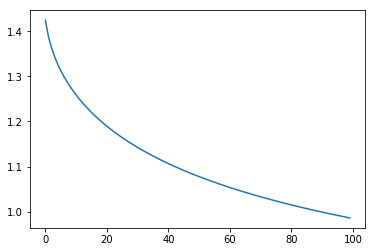

In [90]:
loss_history, _, theta = gradient_descent_ada(X_train, y_train, theta_init)

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])


在该例子，AdaGrad 的下降速度反而更慢，因为梯度提前变为0，训练在$J(\theta)$没有收敛之前就停止了。AdaGrad 的优点一般在 Mini-batch 梯度下降法中才体现出来。

## 正规方程

对于求函数极小值问题，可以使用求导数的方法，令函数的导数为0，然后求解方程，得到解析解。正规方程正是使用这种方法求的损失函数$J(\theta)$的极小值，而线性回归的损失函数$J(\theta)$是一个凸函数，所以极小值就是最小值。

正规方程的求解过程就不详细推导了，正规方程的公式是：
$$
\theta = (X^T X)^{-1} X^T y
$$

如果$m \le n +1$，那么$X^T X$是奇异矩阵，即$X^T X$不可逆。
$X^T X$不可逆的原因可能是：

- 特征之间冗余，比如特征向量中两个特征是线性相关的。
- 特征太多，删去一些特征再进行运算。

正规方程的缺点之一就是$X^T X$不可逆的情况，可以通过正则化的方式解决。另一个缺点是，如果样本的个数太多，特征数量太多($n \gt 10000$)，正规方程的运算会很慢（求逆矩阵的运算复杂）。

**任务12：** 下面来实现正规方程。
提示：Numpy 求逆矩阵的函数是`np.linalg.inv`。

In [93]:
def normal_equation(X, y):
    """正规方程求线性回归方程的参数 theta
    参数：
        X: 训练集数据特征，shape: (m, n+1)
        y: 训练集数据标签，shape: (m, 1)
    返回：
        theta: 线性回归方程的参数
    """
    
    ### START CODE HERE ###
    
    X_T_X = np.dot(X.T, X)
    X_T_X_inv = np.linalg.inv(X_T_X)
    theta = np.dot(np.dot(X_T_X_inv, X.T), y)

    ### END CODE HERE ###
    
    return theta

In [94]:
theta = normal_equation(X_train[:,0:3], y_train) # 偷偷的把x换掉了，这里h(x)又成为了线性的

print("theta = ", theta)


theta =  [[2.9056    ]
 [0.71439293]
 [0.0059491 ]]


恭喜，你已经帮助项目负责人计算出了一个线性模型。

**任务13：** 假设明天的最高温度是$x_1 = 30$°C，人口$x_2 = 1.3$百万，使用通过正规方程计算得到的$\theta$预测明天的城市的峰值用电量（单位：GW）吧！注意，x要进行缩放处理。

In [95]:
x1 = 30
x2 = 1.3

x = np.array([x1, x2]).reshape(1, 2)

### START CODE HERE ###

x = (x - mu) / sigma
x = np.hstack([[[1]], x])
x = x.T
print("x = ", x)
predict = np.dot(theta.T, x) 

### END CODE HERE ###

print("predict = ", predict)


x =  [[1.        ]
 [0.44061723]
 [0.42535673]]
predict =  [[3.22290432]]
